<a href="https://colab.research.google.com/github/suryatejabatchu08/Machine-Learning-Lab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
df = pd.read_csv("/content/DMV_Written_Tests.csv")

In [4]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
def minmax(a):
    return (a - a.min()) / (a.max() - a.min())

In [8]:
test_1 = minmax(df['DMV_Test_1'].values)
test_2 = minmax(df['DMV_Test_2'].values)
y = df['Results'].values.astype(float)
X = np.column_stack((test_1, test_2))

In [9]:
X

array([[0.06542784, 0.69465488],
       [0.00326632, 0.19470455],
       [0.08296784, 0.61961779],
       [0.43176427, 0.81600135],
       [0.7019434 , 0.65539214],
       [0.2153456 , 0.37665959],
       [0.44500891, 0.96545859],
       [0.64449684, 0.23365526],
       [0.65989108, 0.83229079],
       [0.77934283, 0.18940757],
       [0.94315096, 0.11165142],
       [0.64433793, 0.        ],
       [0.74887421, 0.67205614],
       [0.56336978, 0.98314328],
       [0.13586997, 0.6655353 ],
       [0.34273413, 0.85846452],
       [0.55914951, 0.32427783],
       [0.5430494 , 0.23547989],
       [0.58195856, 0.91295399],
       [0.67250409, 0.24862534],
       [0.53481039, 0.17922749],
       [0.85450448, 0.51557164],
       [0.29348214, 0.26737325],
       [0.05952839, 0.19931197],
       [0.68605319, 0.56205138],
       [0.46169753, 0.57643769],
       [0.71853306, 0.20827835],
       [0.90377581, 0.12008007],
       [0.45537943, 0.28788555],
       [0.12508388, 0.50379883],
       [0.

### Task 3: Visualize the Data
---

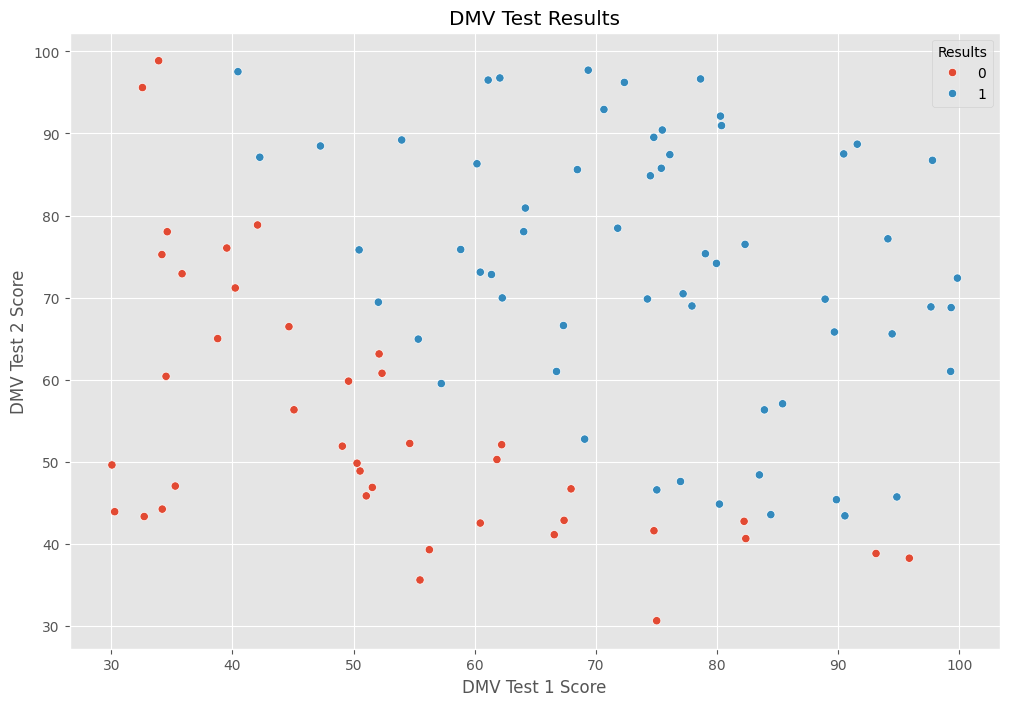

In [9]:
sns.scatterplot(x='DMV_Test_1', y='DMV_Test_2', hue='Results', data=df)
plt.xlabel('DMV Test 1 Score')
plt.ylabel('DMV Test 2 Score')
plt.title('DMV Test Results')
plt.show()

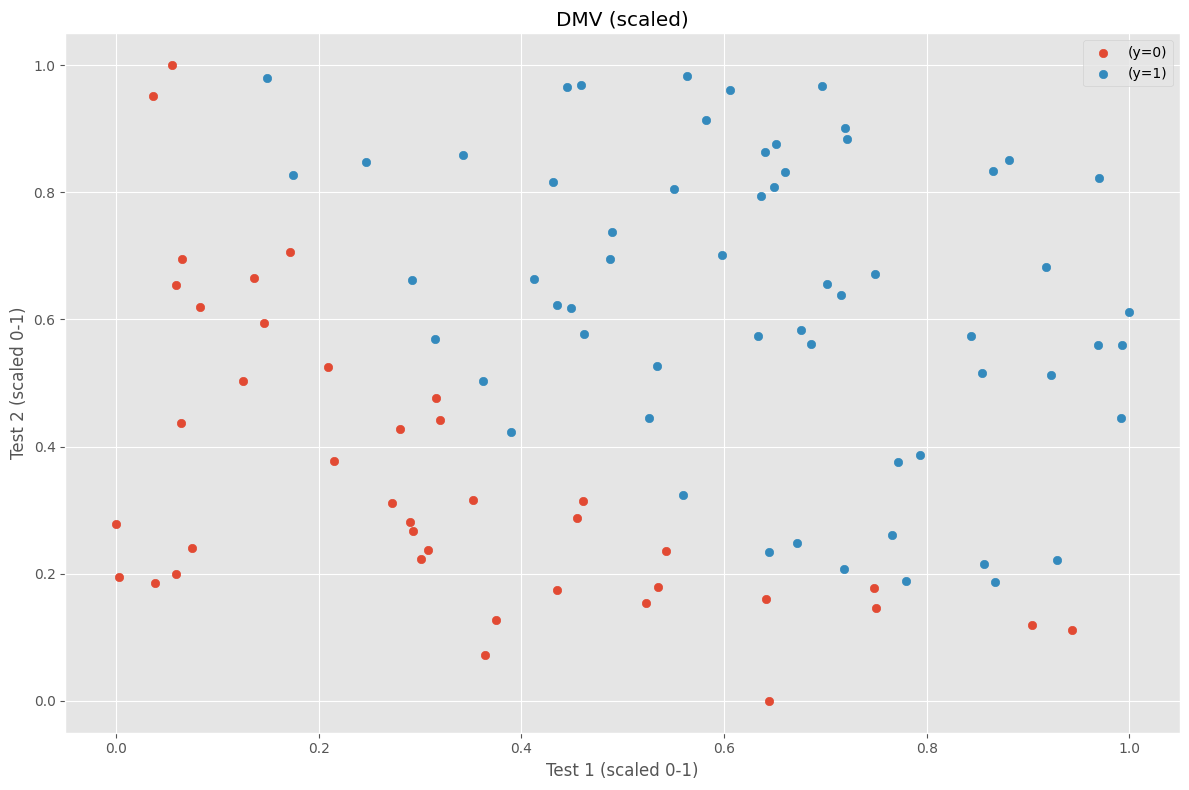

In [12]:
plt.figure()
plt.scatter(X[y==0,0], X[y==0,1], label='(y=0)')
plt.scatter(X[y==1,0], X[y==1,1], label='(y=1)')
plt.xlabel('Test 1 (scaled 0-1)')
plt.ylabel('Test 2 (scaled 0-1)')
plt.legend()
plt.title('DMV (scaled)')
plt.tight_layout()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

#### Notes

Sigmoid Function maps any input value in between 0 and 1

In [13]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [14]:
print(sigmoid(5)) #sample test

0.9933071490757153


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [15]:
def log_loss(p,y):
  eps = 1e-12
  p = np.clip(p, eps, 1-eps)
  return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

### Task 6: Cost and Gradient at Initialization
---

In [16]:
def cost_function(x,y):
  m = len(y)
  return -(1/m)*np.sum(y*np.log(x) + (1-y)*np.log(1-x))

In [ ]:
def gradient():
  return (1/m) * np.sum(x)

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$